In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE

In [ ]:
train_df = pd.read_csv("/content/train.csv")
train_df.head() #Loading and showing the data

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
train_df.shape # Shape

(7352, 564)

In [9]:
test_df = pd.read_csv("/content/test.csv")
test_df.head() #Loading and showing the data

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [10]:
test_df.shape # Shape

(2947, 564)

In [ ]:
print(f"duplicates in train data {train_df.duplicated().sum()}")
print(f"duplicates in test data {test_df.duplicated().sum()}")

duplicates in train data 0
duplicates in test data 0


In [ ]:
print(f"Nan Values in train data {train_df.isnull().values.sum()}")
print(f"Nan Values in test data {test_df.isnull().values.sum()}")

Nan Values in train data 0
Nan Values in test data 0


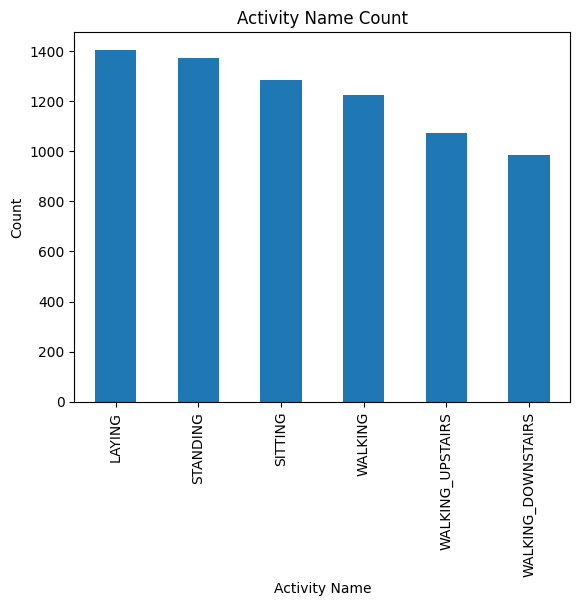

In [ ]:
train_df["ActivityName"].value_counts().plot(kind="bar")
plt.title("Activity Name Count")
plt.xlabel("Activity Name")
plt.ylabel("Count")
plt.show()

**Observation**
>Data is almost balanced.

**Exploratory Data Analysis.**

In [ ]:
train_df["tBodyAccMagmean"]

,tBodyAccMagmean
0,-0.959434
1,-0.979289
2,-0.983703
3,-0.986542
4,-0.992827
...,...
7347,-0.031719
7348,-0.065256
7349,-0.003936
7350,-0.002445


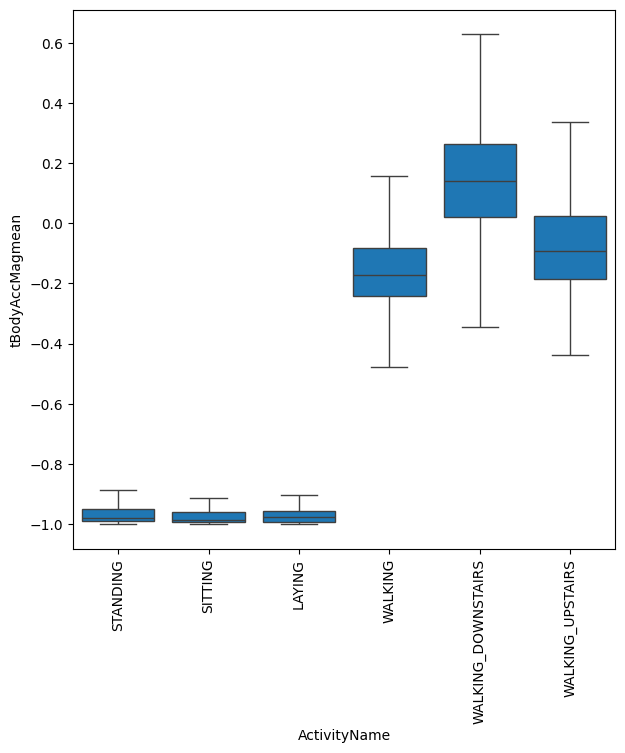

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x="ActivityName",y="tBodyAccMagmean",data=train_df,showfliers=False,saturation=1)
plt.xticks(rotation=90)
plt.show()

**Observation**
> we can easily classify stationary and moving activites by **tBodyAccMagmean**

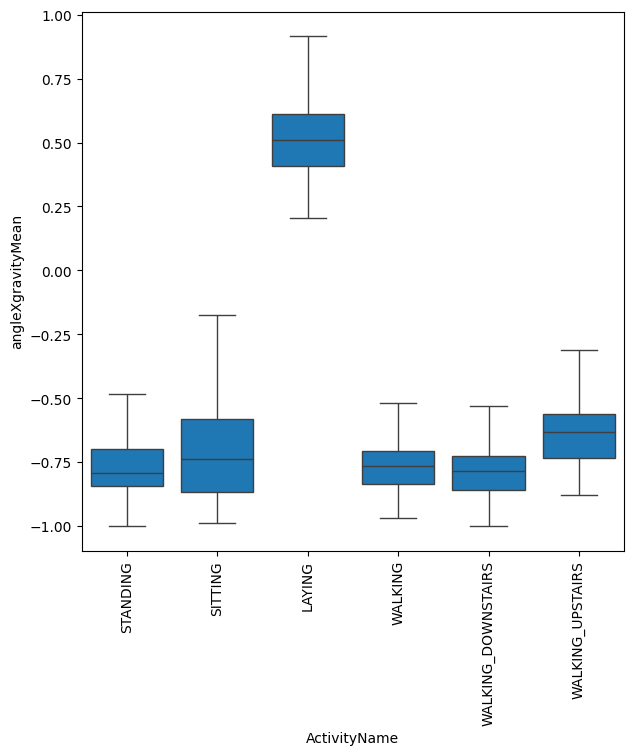

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x="ActivityName",y="angleXgravityMean",data=train_df,showfliers=False,saturation=1)
plt.xticks(rotation=90)
plt.show()

**Observation**
> we can easily classify laying vs other activites by **angleXgravityMean**

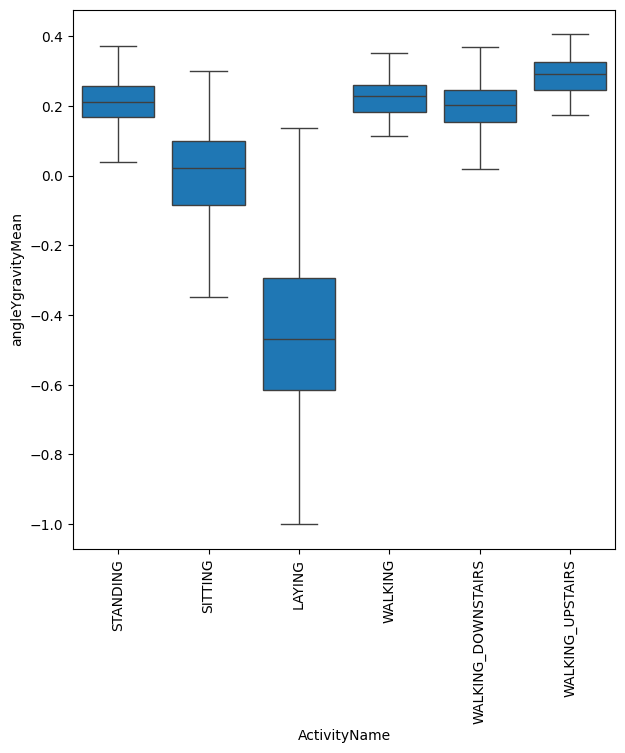

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x="ActivityName",y="angleYgravityMean",data=train_df,showfliers=False,saturation=1)
plt.xticks(rotation=90)
plt.show()

**Observation**
> we can easily classify laying vs other activites by **angleYgravityMean**

**Data Visualization Using TSNE.**

In [ ]:
x_reduced= TSNE(n_components=2,perplexity=2,verbose=2,n_iter=1000).fit_transform(train_df.drop(["ActivityName"],axis=1))

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 0.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.685862
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 116.8007584, gradient norm = 0.0481384 (50 iterations in 0.611s)
[t-SNE] Iteration 100: error = 102.6374817, gradient norm = 0.0271696 (50 iterations in 0.426s)
[t-SNE] Iteration 150: error = 96.7628632, gradient norm = 

In [ ]:
x_reduced_df=pd.DataFrame(x_reduced,columns=["x","y"])
x_reduced_df["ActivityName"]=train_df["ActivityName"]
x_reduced_df.head()

,x,y,ActivityName
0,86.380302,-11.759210,STANDING
1,89.525040,-15.363175,STANDING
2,89.773010,-15.017932,STANDING
3,81.099480,-21.713087,STANDING
4,88.595512,-19.548714,STANDING


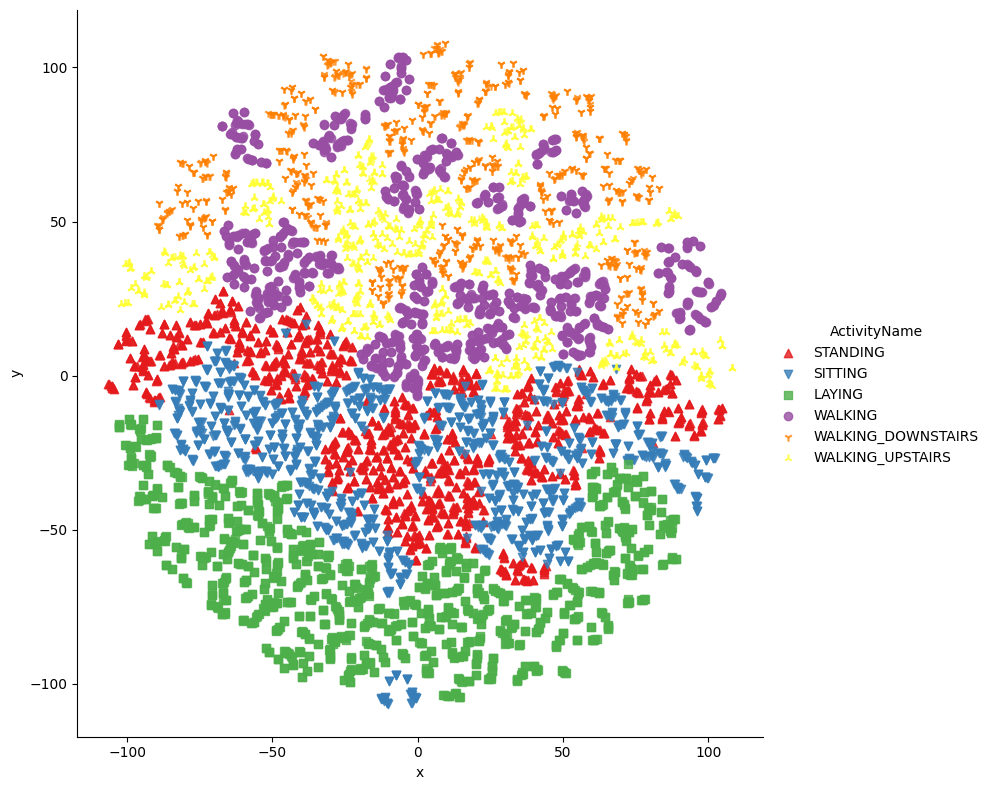

In [ ]:
sns.lmplot(data=x_reduced_df,x="x",y="y",hue="ActivityName",fit_reg=False,palette="Set1",markers=['^','v','s','o', '1','2'],height=8)
plt.show()

**Observation**
>we are going to face challanges while classifying sitting and standing.

In [ ]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


**Bulding Models**

In [13]:
x_train = train_df.drop(["ActivityName","Activity","subject"],axis=1)
y_train= train_df["ActivityName"]

In [14]:
x_test = test_df.drop(["ActivityName","Activity","subject"],axis=1)
y_test= test_df["ActivityName"]

In [ ]:
x_train.shape  , y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

##Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
clf=linear_model.LogisticRegression()
parameters={
    "C":[0.01, 0.1, 1, 10, 20, 30],
    "penalty":["l1","l2"]
}
grid_search= GridSearchCV(clf,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
best_model=grid_search.best_estimator_
best_model.score(x_test,y_test)

0.9579233118425518

In [ ]:
ypred=best_model.predict(x_test)

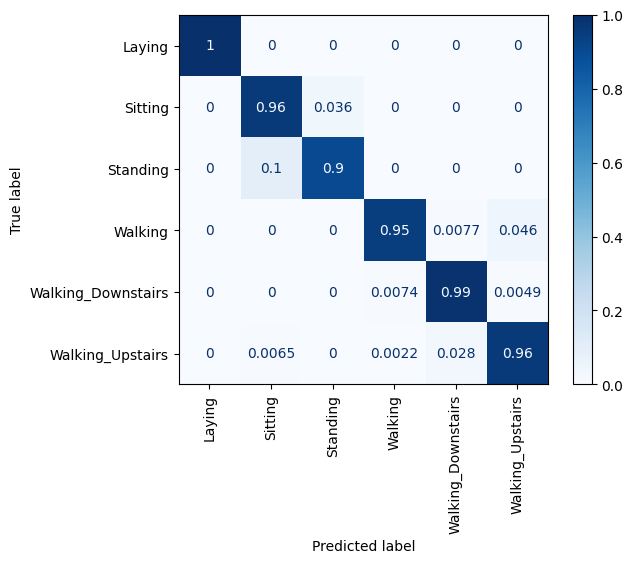

In [ ]:
cm=confusion_matrix(ypred,y_test)
cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd=ConfusionMatrixDisplay(cm,display_labels=["Laying","Sitting","Standing","Walking","Walking_Downstairs","Walking_Upstairs"])
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

##Linear SVC with Grid Search

In [ ]:
from sklearn.svm import LinearSVC
clf= LinearSVC()
parameters={
    "C":[0.01, 0.1, 1, 10, 20, 30],
    "penalty":["l1","l2"]
}
grid_search= GridSearchCV(clf,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_search.best_params_ # Getting best parameters for linear svm

{'C': 1, 'penalty': 'l2'}

In [ ]:
best_model=grid_search.best_estimator_
best_model.score(x_test,y_test) # model accuray with best hyperparameters

0.9633525619273838

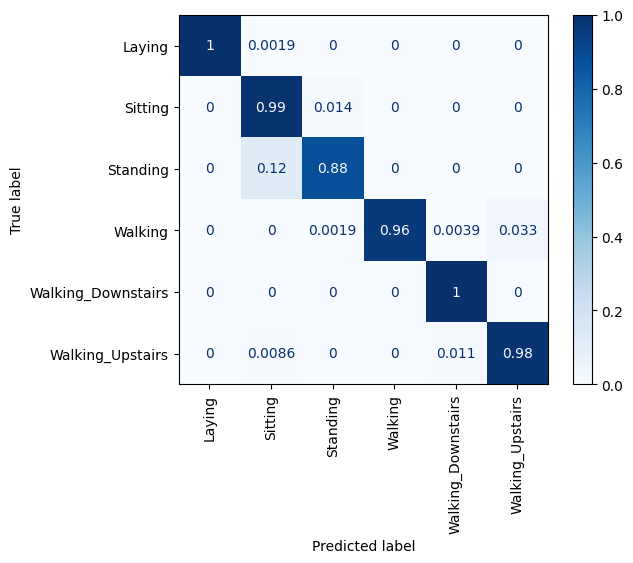

In [ ]:
ypred=best_model.predict(x_test)
cm=confusion_matrix(ypred,y_test)
cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd=ConfusionMatrixDisplay(cm,display_labels=["Laying","Sitting","Standing","Walking","Walking_Downstairs","Walking_Upstairs"])
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**Kernal SVM with GridSearch**

In [ ]:
from sklearn.svm import SVC
clf= SVC(kernel="rbf")
parameters={
    "C":[2, 8, 16,],
    'gamma': [ 0.0078125, 0.125, 2]
}
grid_search= GridSearchCV(clf,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [2, 8, 16], 'gamma': [0.0078125, 0.125, 2]})

In [ ]:
grid_search.best_params_ # best parameters

{'C': 16, 'gamma': 0.0078125}

In [ ]:
best_model=grid_search.best_estimator_
best_model.score(x_test,y_test) # model accuray with best hyperparameters

0.9626739056667798

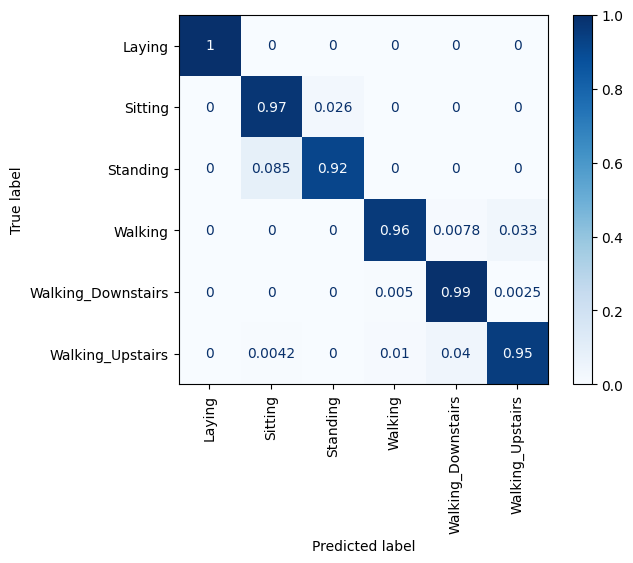

In [ ]:
ypred=best_model.predict(x_test)
cm=confusion_matrix(ypred,y_test)
cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd=ConfusionMatrixDisplay(cm,display_labels=["Laying","Sitting","Standing","Walking","Walking_Downstairs","Walking_Upstairs"])
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters={"max_depth":np.arange(3,10,2)}
dt=DecisionTreeClassifier()
grid_search= GridSearchCV(dt,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 5, 7, 9])})

In [ ]:
grid_search.best_params_ # best parameters

{'max_depth': 9}

In [ ]:
best_model=grid_search.best_estimator_
best_model.score(x_test,y_test) # model accuray with best hyperparameters

0.8720732948761453

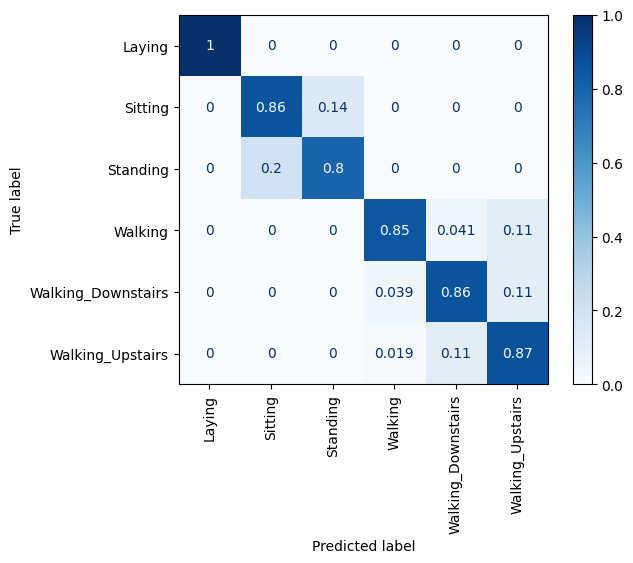

In [ ]:
ypred=best_model.predict(x_test)
cm=confusion_matrix(ypred,y_test)
cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd=ConfusionMatrixDisplay(cm,display_labels=["Laying","Sitting","Standing","Walking","Walking_Downstairs","Walking_Upstairs"])
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**Random Forest.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc=RandomForestClassifier()
grid_search= GridSearchCV(rfc,parameters,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 5, 7, 9])})

In [ ]:
grid_search.best_params_ # best parameters

{'max_depth': 9}

In [ ]:
best_model=grid_search.best_estimator_
best_model.score(x_test,y_test) # model accuray with best hyperparameters

0.9192399049881235

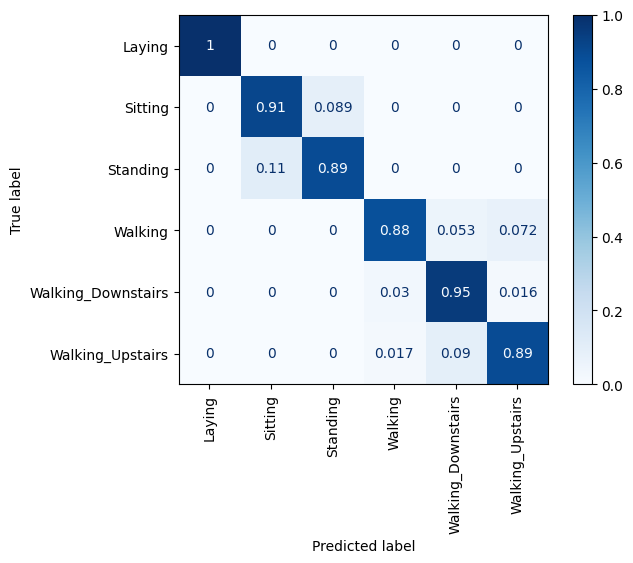

In [ ]:
ypred=best_model.predict(x_test)
cm=confusion_matrix(ypred,y_test)
cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd=ConfusionMatrixDisplay(cm,display_labels=["Laying","Sitting","Standing","Walking","Walking_Downstairs","Walking_Upstairs"])
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()